# Predictive Maintenance

# Background
I will be using the data from UCI about predictive maintenance. The purpose of this project is to apply machine learning algorithm in the context of reliability engineering.

## Objective
Prediction of whether mechanical part will fail is an important knowledge in the industry. The failure of mechnical component can disrupt and even stop the production flow in a factory, for example. Hence, developing a model that can be used to predict the failure of a mechanical part  can be important so that corrective and preventive action such as maintainance can be performed and planned to avoid production loss.

## Problem Statement
Q1: how to predict component failure without having to stop  the machine operation and perform destructive test?

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
df = pd.read_csv("predictive_maintenance.csv")
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


In [14]:
# Description of data
df.dtypes

UDI                          int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Target                       int64
Failure Type                object
dtype: object

In [17]:
df.shape

(10000, 10)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [19]:
df.isna().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [26]:
df[['Type','Air temperature [K]','Process temperature [K]','Rotational speed [rpm]'
    ,'Torque [Nm]','Tool wear [min]']].duplicated().sum()

0

# Exploratory Data Analysis

In [27]:
Numerical_Features = df[['Air temperature [K]','Process temperature [K]','Rotational speed [rpm]'
    ,'Torque [Nm]','Tool wear [min]']]
Categorical_Features = df[['Type']]
Target = df[['Target','Failure Type']]

## Numerical

In [28]:
# distribution of the data
Numerical_Features.describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,300.004930,310.005560,1538.776100,39.986910,107.951000
std,2.000259,1.483734,179.284096,9.968934,63.654147
min,295.300000,305.700000,1168.000000,3.800000,0.000000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000
max,304.500000,313.800000,2886.000000,76.600000,253.000000


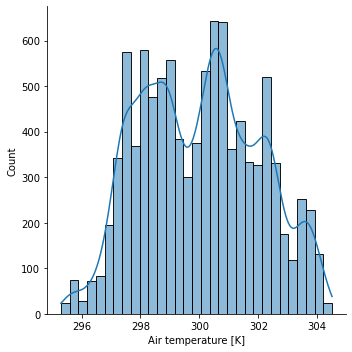

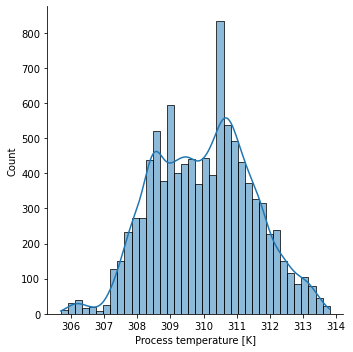

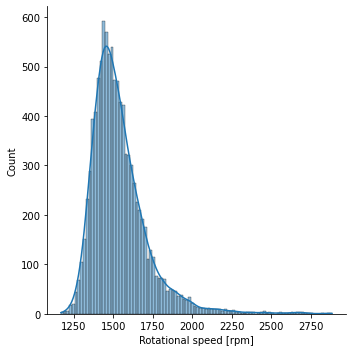

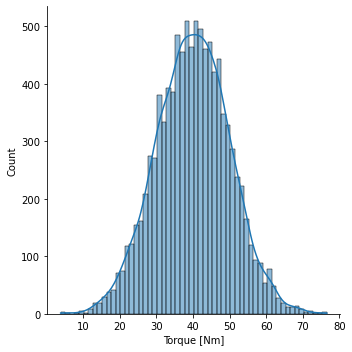

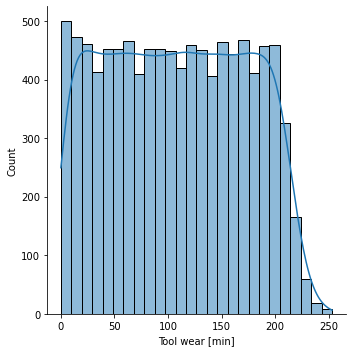

In [45]:
for col in Numerical_Features:
    sns.displot(data=df, x = col, kde=True)

## Categorical

In [32]:
for i in Categorical_Features.columns:
    print("------------------Feature: {}---------------------\n".format(i))
    print(Categorical_Features[i].value_counts(),'\n')

------------------Feature Type---------------------

L    6000
M    2997
H    1003
Name: Type, dtype: int64 



In [33]:
for i in Target.columns:
    print("------------------Target variable: {}---------------------\n".format(i))
    print(Target[i].value_counts(),'\n')

------------------Target variable: Target---------------------

0    9661
1     339
Name: Target, dtype: int64 

------------------Target variable: Failure Type---------------------

No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: Failure Type, dtype: int64 



Value % of Type column
L    60.00
M    29.97
H    10.03
Name: Type, dtype: float64 



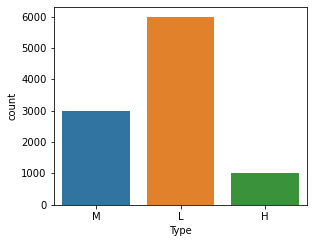

In [39]:
#Percentage for Categorical Variable
for col in Categorical_Features:
    print(f"Value % of {col} column")
    print(round(df[col].value_counts()/len(df)*100,2),"\n")

#Bar Plot for Categorical Variable
plt.figure(figsize=(10,8))

for i,col in enumerate(Categorical_Features):
    plt.subplot(2,2,i + 1)
    ax = sns.countplot(data = df, x = col)

Value % of Target column
0    96.61
1     3.39
Name: Target, dtype: float64 

Value % of Failure Type column
No Failure                  96.52
Heat Dissipation Failure     1.12
Power Failure                0.95
Overstrain Failure           0.78
Tool Wear Failure            0.45
Random Failures              0.18
Name: Failure Type, dtype: float64 



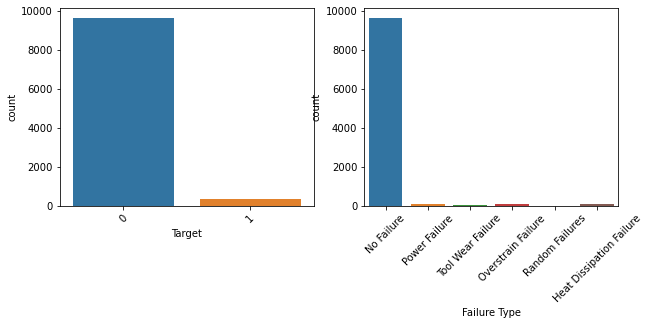

In [41]:
#Percentage
for col in Target:
    print(f"Value % of {col} column")
    print(round(df[col].value_counts()/len(df)*100,2),"\n")

#Bar Plot
plt.figure(figsize=(10,8))

for i,col in enumerate(Target):
    plt.subplot(2,2,i + 1)
    ax = sns.countplot(data = df, x = col)
    plt.xticks(rotation=45)

# Failure Pattern

In [85]:
pd.pivot_table(df, values=df[['Target']],index=['Failure Type'], aggfunc=['count'] )

,count
,Target
Failure Type,
Heat Dissipation Failure,112
No Failure,9652
Overstrain Failure,78
Power Failure,95
Random Failures,18
Tool Wear Failure,45
